<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding Outliers**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform exploratory data analysis or EDA. 
You will explore the distribution of key variables and focus on identifying outliers in this lab.


## Objectives


In this lab, you will perform the following:


-  Analyze the distribution of key variables in the dataset.

-  Identify and remove outliers using statistical methods.

-  Perform relevant statistical and correlation analysis.


#### Install and import the required libraries


In [1]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 191.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 185.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 163.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 165.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 99.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 169.6 MB/s eta 0:00:00


<h3>Step 1: Load and Explore the Dataset</h3>


Load the dataset into a DataFrame and examine the structure of the data.


In [2]:
file_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"

#Create the dataframe
df = pd.read_csv(file_url)

#Display the top 10 records
df.head()


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


<h3>Step 2: Plot the Distribution of Industry</h3>


Explore how respondents are distributed across different industries.

- Plot a bar chart to visualize the distribution of respondents by industry.

- Highlight any notable trends.


In [3]:
print(df['Industry'].isnull().sum())

36579


In [5]:
df['Industry'].fillna('Unknown', inplace=True)

/tmp/ipykernel_300/1448214415.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Industry'].fillna('Unknown', inplace=True)


In [6]:
print(df['Industry'].isnull().sum())

0


In [7]:
print(df['Industry'].value_counts())

Industry
Unknown                                       36579
Software Development                          11918
Other:                                         3077
Fintech                                        1641
Internet, Telecomm or Information Services     1629
Banking/Financial Services                     1371
Healthcare                                     1277
Manufacturing                                  1265
Retail and Consumer Services                   1264
Government                                      962
Media & Advertising Services                    894
Higher Education                                890
Transportation, or Supply Chain                 859
Computer Systems Design and Services            844
Energy                                          578
Insurance                                       389
Name: count, dtype: int64


In [9]:
industry_distribution = df['Industry'].value_counts()

/tmp/ipykernel_300/1969392208.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=industry_distribution.values, y=industry_distribution.index, palette='viridis')


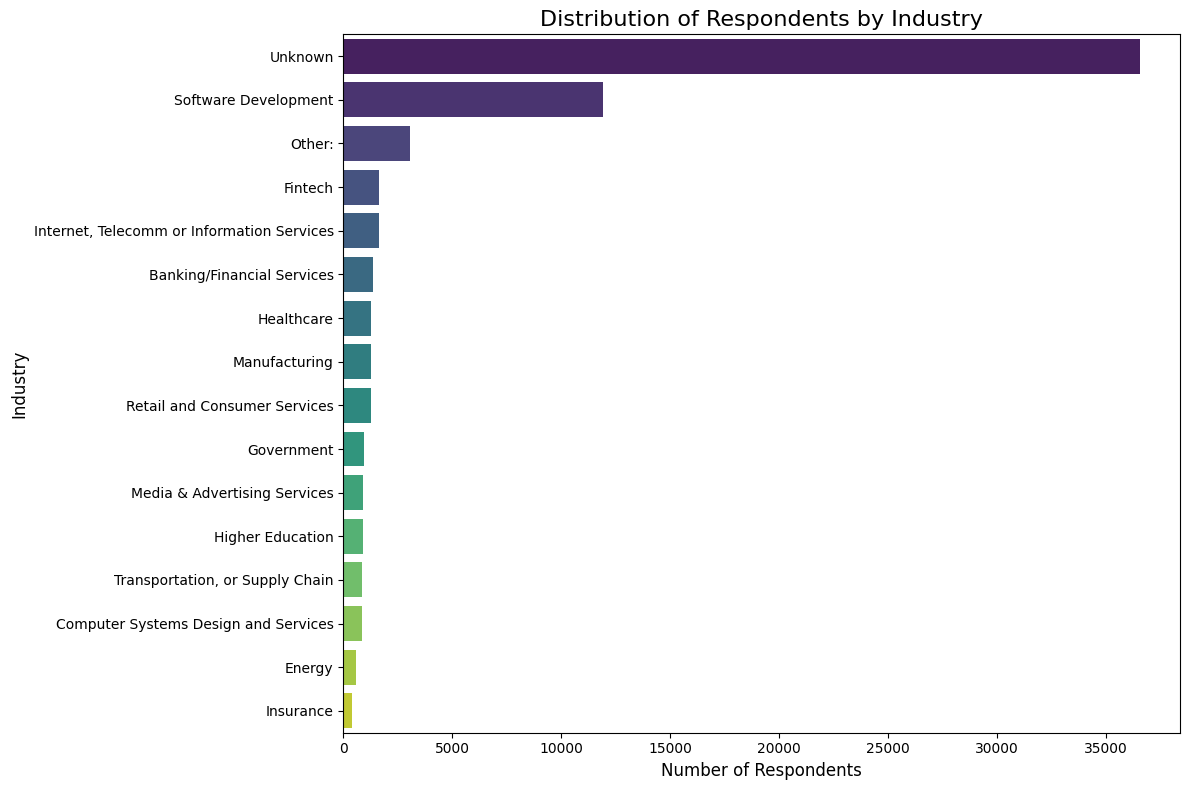

In [10]:
##Write your code here
import seaborn as sns
import matplotlib.pyplot as plt

# Create a bar chart
plt.figure(figsize=(12, 8))
sns.barplot(x=industry_distribution.values, y=industry_distribution.index, palette='viridis')

# Add titles and labels
plt.title("Distribution of Respondents by Industry", fontsize=16)
plt.xlabel("Number of Respondents", fontsize=12)
plt.ylabel("Industry", fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

<h3>Step 3: Identify High Compensation Outliers</h3>


Identify respondents with extremely high yearly compensation.

- Calculate basic statistics (mean, median, and standard deviation) for `ConvertedCompYearly`.

- Identify compensation values exceeding a defined threshold (e.g., 3 standard deviations above the mean).


In [11]:
mean_comp = df['ConvertedCompYearly'].mean()
median_comp = df['ConvertedCompYearly'].median()
std_comp = df['ConvertedCompYearly'].std()

# Print the results
print(f"Mean Compensation: {mean_comp:.2f}")
print(f"Median Compensation: {median_comp:.2f}")
print(f"Standard Deviation: {std_comp:.2f}")

Mean Compensation: 86155.29
Median Compensation: 65000.00
Standard Deviation: 186756.97


In [12]:
outlier_threshold = mean_comp + 3 * std_comp

# Print the threshold
print(f"Outlier Threshold: {outlier_threshold:.2f}")

Outlier Threshold: 646426.21


In [14]:
print(df.columns)

Index(['ResponseId', 'MainBranch', 'Age', 'Employment', 'RemoteWork', 'Check',
       'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline',
       ...
       'JobSatPoints_6', 'JobSatPoints_7', 'JobSatPoints_8', 'JobSatPoints_9',
       'JobSatPoints_10', 'JobSatPoints_11', 'SurveyLength', 'SurveyEase',
       'ConvertedCompYearly', 'JobSat'],
      dtype='object', length=114)


In [15]:
high_comp_outliers = df[df['ConvertedCompYearly'] > outlier_threshold]

# Display the number of outliers and their details
print(f"Number of High Compensation Outliers: {len(high_comp_outliers)}")
print(high_comp_outliers[['ResponseId', 'ConvertedCompYearly', 'Country', 'EdLevel']])

Number of High Compensation Outliers: 89
       ResponseId  ConvertedCompYearly                   Country  \
529           530             650000.0  United States of America   
828           829            1000000.0  United States of America   
1932         1933             945000.0  United States of America   
2171         2172             750000.0  United States of America   
2187         2188            2000000.0                     Gabon   
...           ...                  ...                       ...   
38219       38220            1000000.0                    Poland   
39643       39644            1300000.0  United States of America   
40066       40067             800000.0  United States of America   
40952       40953             750000.0  United States of America   
41027       41028             700000.0  United States of America   

                                                 EdLevel  
529         Bachelor’s degree (B.A., B.S., B.Eng., etc.)  
828      Master’s degree

In [16]:
##Write your code here
# Analyze the distribution of outliers by country
outlier_country_distribution = high_comp_outliers['Country'].value_counts()
print(outlier_country_distribution)

# Analyze the distribution of outliers by education level
outlier_edlevel_distribution = high_comp_outliers['EdLevel'].value_counts()
print(outlier_edlevel_distribution)

Country
United States of America                                42
United Kingdom of Great Britain and Northern Ireland     5
Iran, Islamic Republic of...                             4
Pakistan                                                 4
Ukraine                                                  3
Germany                                                  3
Brazil                                                   3
Canada                                                   3
Austria                                                  2
Ethiopia                                                 2
India                                                    2
Australia                                                2
Russian Federation                                       1
Denmark                                                  1
Gabon                                                    1
Finland                                                  1
Kazakhstan                                      

<h3>Step 4: Detect Outliers in Compensation</h3>


Identify outliers in the `ConvertedCompYearly` column using the IQR method.

- Calculate the Interquartile Range (IQR).

- Determine the upper and lower bounds for outliers.

- Count and visualize outliers using a box plot.


In [17]:
# Calculate Q1, Q3, and IQR
Q1 = df['ConvertedCompYearly'].quantile(0.25)
Q3 = df['ConvertedCompYearly'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['ConvertedCompYearly'] < lower_bound) | (df['ConvertedCompYearly'] > upper_bound)]

# Count the number of outliers
print(f"Number of Outliers: {len(outliers)}")

Number of Outliers: 978


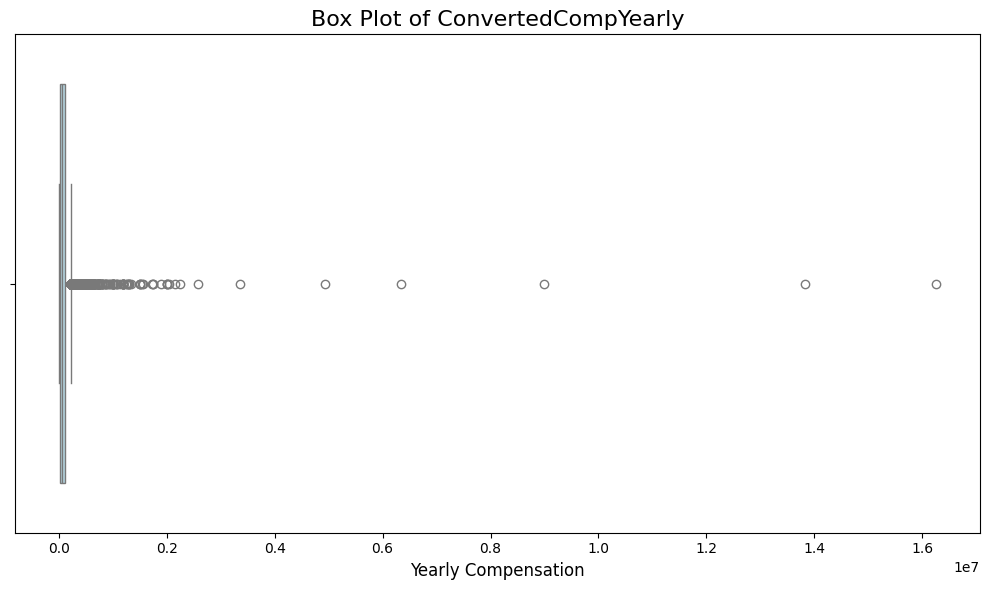

In [18]:
##Write your code here
import seaborn as sns
import matplotlib.pyplot as plt

# Create a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['ConvertedCompYearly'], color='lightblue')

# Add titles and labels
plt.title("Box Plot of ConvertedCompYearly", fontsize=16)
plt.xlabel("Yearly Compensation", fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

<h3>Step 5: Remove Outliers and Create a New DataFrame</h3>


Remove outliers from the dataset.

- Create a new DataFrame excluding rows with outliers in `ConvertedCompYearly`.
- Validate the size of the new DataFrame.


In [20]:
# Calculate Q1, Q3, and IQR
Q1 = df['ConvertedCompYearly'].quantile(0.25)
Q3 = df['ConvertedCompYearly'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Print the results
print(f"Q1: {Q1}, Q3: {Q3}, IQR: {IQR}")
print(f"Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")

Q1: 32712.0, Q3: 107971.5, IQR: 75259.5
Lower Bound: -80177.25, Upper Bound: 220860.75


In [25]:
!pip install scipy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.3/37.3 MB 176.3 MB/s eta 0:00:0000:01


In [26]:
from scipy.stats import zscore

# Calculate Z-scores
df['Z_Score'] = zscore(df['ConvertedCompYearly'])

# Filter out rows with outliers
df_cleaned = df[(df['Z_Score'] >= -3) & (df['Z_Score'] <= 3)]

# Drop the Z-score column after filtering
df_cleaned = df_cleaned.drop(columns=['Z_Score'])

# Display the size of the new DataFrame
print(f"Original Dataset Size: {len(df)}")
print(f"Cleaned Dataset Size: {len(df_cleaned)}")

Original Dataset Size: 65437
Cleaned Dataset Size: 0


In [27]:
# Calculate Q1, Q3, and IQR
Q1 = df['ConvertedCompYearly'].quantile(0.25)
Q3 = df['ConvertedCompYearly'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Print the results
print(f"Q1: {Q1}, Q3: {Q3}, IQR: {IQR}")
print(f"Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")

Q1: 32712.0, Q3: 107971.5, IQR: 75259.5
Lower Bound: -80177.25, Upper Bound: 220860.75


In [28]:
lower_bound = -80177.25
upper_bound = 220860.75

# Filter the dataset for values within the bounds
filtered_df = df[(df['ConvertedCompYearly'] >= lower_bound) & (df['ConvertedCompYearly'] <= upper_bound)]

In [30]:
lower_bound = -80177.25
upper_bound = 220860.75

# Identify outliers
outliers = df[(df['ConvertedCompYearly'] < lower_bound) | (df['ConvertedCompYearly'] > upper_bound)]

# Count the number of outliers
num_outliers = len(outliers)
print(f"Number of Outliers: {num_outliers}")

Number of Outliers: 978


In [31]:
lower_bound = -80177.25
upper_bound = 220860.75

# Filter the dataset to exclude outliers
df_cleaned = df[(df['ConvertedCompYearly'] >= lower_bound) & (df['ConvertedCompYearly'] <= upper_bound)]

# Display the size of the cleaned dataset
print(f"Original Dataset Size: {len(df)}")
print(f"Cleaned Dataset Size: {len(df_cleaned)}")

Original Dataset Size: 65437
Cleaned Dataset Size: 22457


In [29]:
num_records_within_bounds = len(filtered_df)

# Print the result
print(f"Number of Records Within Bounds: {num_records_within_bounds}")

Number of Records Within Bounds: 22457


count    2.343500e+04
mean     8.615529e+04
std      1.867570e+05
min      1.000000e+00
25%      3.271200e+04
50%      6.500000e+04
75%      1.079715e+05
max      1.625660e+07
Name: ConvertedCompYearly, dtype: float64


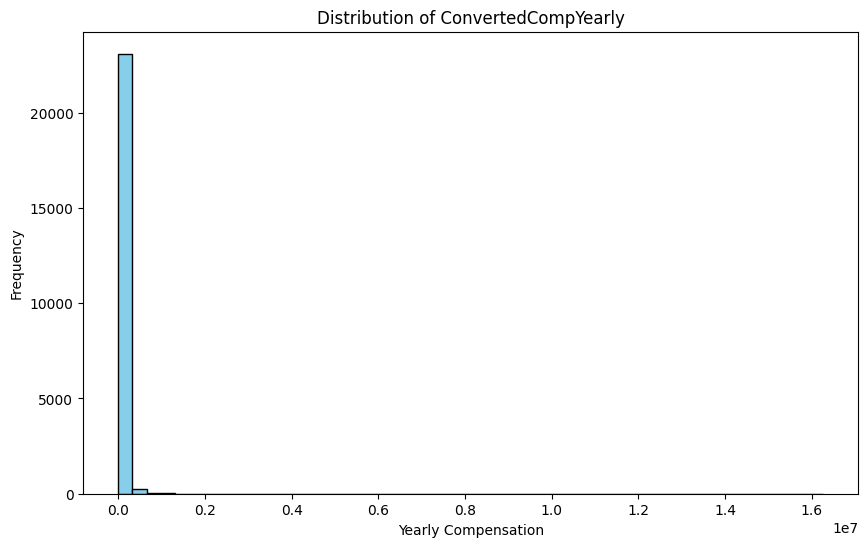

In [21]:
# Summary statistics
print(df['ConvertedCompYearly'].describe())

# Histogram
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(df['ConvertedCompYearly'].dropna(), bins=50, color='skyblue', edgecolor='black')
plt.title("Distribution of ConvertedCompYearly")
plt.xlabel("Yearly Compensation")
plt.ylabel("Frequency")
plt.show()

In [22]:
# Filter out rows with outliers
df_cleaned = df[(df['ConvertedCompYearly'] >= lower_bound) & (df['ConvertedCompYearly'] <= upper_bound)]

# Display the size of the new DataFrame
print(f"Original Dataset Size: {len(df)}")
print(f"Cleaned Dataset Size: {len(df_cleaned)}")

Original Dataset Size: 65437
Cleaned Dataset Size: 22457


In [19]:
# Filter out rows with outliers
df_cleaned = df[(df['ConvertedCompYearly'] >= lower_bound) & (df['ConvertedCompYearly'] <= upper_bound)]

# Display the size of the new DataFrame
print(f"Original Dataset Size: {len(df)}")
print(f"Cleaned Dataset Size: {len(df_cleaned)}")

Original Dataset Size: 65437
Cleaned Dataset Size: 22457


In [32]:
outlier_threshold = mean_comp + 3 * std_comp

In [37]:
print(outlier_threshold)

646426.2065215341


In [40]:
num_nan = df['ConvertedCompYearly'].isna().sum()
print(f"Number of NaN values: {num_nan}")

Number of NaN values: 42002


In [39]:
df_cleaned_new1 = df[df['ConvertedCompYearly'] < 646426]
print(len(df_cleaned_new1))

89


In [33]:
high_comp_outliers = df[df['ConvertedCompYearly'] > outlier_threshold]

# Display the number of outliers
print(f"Number of High Compensation Outliers: {len(high_comp_outliers)}")

Number of High Compensation Outliers: 89


In [35]:
# Remove high compensation outliers
df_cleaned_new = df[df['ConvertedCompYearly'] < outlier_threshold]

# Display the size of the cleaned dataset
print(f"Original Dataset Size: {len(df)}")
print(f"Cleaned Dataset Size: {len(df_cleaned_new)}")

Original Dataset Size: 65437
Cleaned Dataset Size: 23346


In [41]:
nan_distribution = df[df['ConvertedCompYearly'].isna()]['Employment'].value_counts()
print(nan_distribution)

# Check the distribution of NaN values by Education level
nan_distribution_edlevel = df[df['ConvertedCompYearly'].isna()]['EdLevel'].value_counts()
print(nan_distribution_edlevel)

Employment
Employed, full-time                                                                                                                                   21455
Student, full-time                                                                                                                                     4709
Independent contractor, freelancer, or self-employed                                                                                                   3222
Not employed, but looking for work                                                                                                                     2340
Employed, full-time;Independent contractor, freelancer, or self-employed                                                                               1865
                                                                                                                                                      ...  
Not employed, but looking for work;Independent contra

In [42]:
median_comp = df['ConvertedCompYearly'].median()
df['ConvertedCompYearly'] = df['ConvertedCompYearly'].fillna(median_comp)

In [43]:
df_outliers = df[df['ConvertedCompYearly'] > 646426]
print(f"Number of Outliers: {len(df_outliers)}")

Number of Outliers: 89


In [44]:
df_non_outliers = df[df['ConvertedCompYearly'] <= 646426]
print(f"Number of Non-Outliers: {len(df_non_outliers)}")

Number of Non-Outliers: 65348


In [45]:
total_rows = len(df_outliers) + len(df_non_outliers)
print(f"Total Rows Accounted For: {total_rows}")

Total Rows Accounted For: 65437


In [48]:
df_cleaned = df[df['ConvertedCompYearly'] <= outlier_threshold]

# Display the size of the cleaned dataset
print(f"Original Dataset Size: {len(df)}")
print(f"Cleaned Dataset Size: {len(df_cleaned)}")

Original Dataset Size: 65437
Cleaned Dataset Size: 65348


In [49]:
num_removed = len(df) - len(df_cleaned)
print(f"Number of Rows Removed: {num_removed}")

Number of Rows Removed: 89


In [50]:
print("Original Dataset Summary:")
print(df['ConvertedCompYearly'].describe())

print("\nCleaned Dataset Summary:")
print(df_cleaned['ConvertedCompYearly'].describe())

Original Dataset Summary:
count    6.543700e+04
mean     7.257636e+04
std      1.122207e+05
min      1.000000e+00
25%      6.500000e+04
50%      6.500000e+04
75%      6.500000e+04
max      1.625660e+07
Name: ConvertedCompYearly, dtype: float64

Cleaned Dataset Summary:
count     65348.000000
mean      70463.556972
std       42265.743141
min           1.000000
25%       65000.000000
50%       65000.000000
75%       65000.000000
max      644437.000000
Name: ConvertedCompYearly, dtype: float64


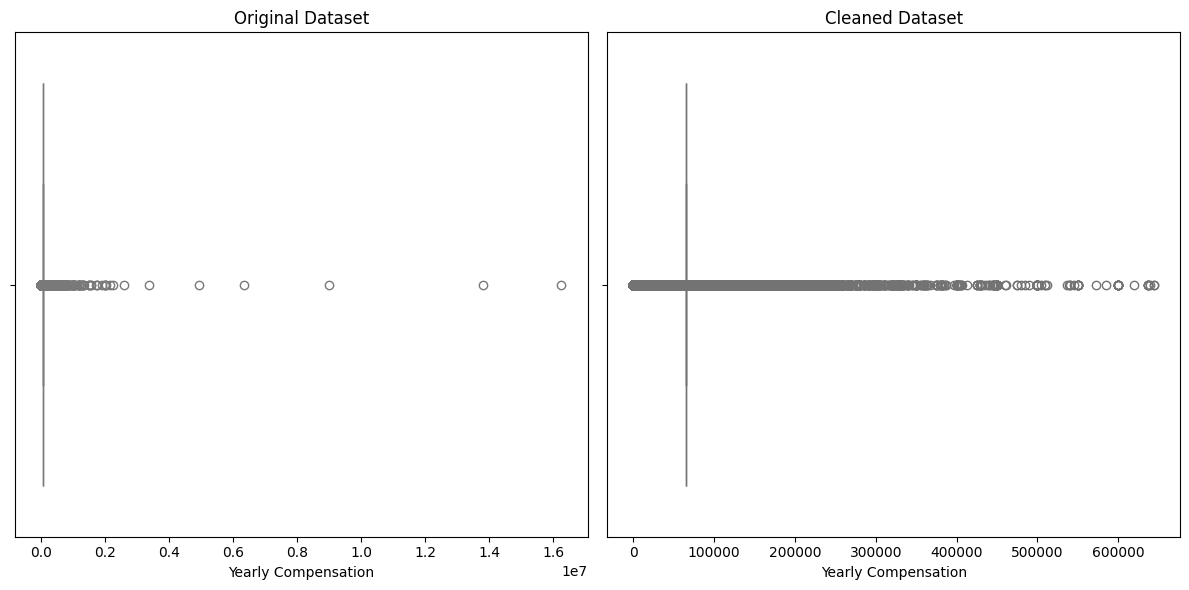

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

# Box plot for the original dataset
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x=df['ConvertedCompYearly'], color='lightblue')
plt.title("Original Dataset")
plt.xlabel("Yearly Compensation")

# Box plot for the cleaned dataset
plt.subplot(1, 2, 2)
sns.boxplot(x=df_cleaned['ConvertedCompYearly'], color='lightgreen')
plt.title("Cleaned Dataset")
plt.xlabel("Yearly Compensation")

plt.tight_layout()
plt.show()

In [52]:
df.to_csv("employment_education_data.csv", index=False)

In [ ]:
##Write your code here

<h3>Step 6: Correlation Analysis</h3>


Analyze the correlation between `Age` (transformed) and other numerical columns.

- Map the `Age` column to approximate numeric values.

- Compute correlations between `Age` and other numeric variables.

- Visualize the correlation matrix.


In [ ]:
##Write your code here

<h3> Summary </h3>


In this lab, you developed essential skills in **Exploratory Data Analysis (EDA)** with a focus on outlier detection and removal. Specifically, you:


- Loaded and explored the dataset to understand its structure.

- Analyzed the distribution of respondents across industries.

- Identified and removed high compensation outliers using statistical thresholds and the Interquartile Range (IQR) method.

- Performed correlation analysis, including transforming the `Age` column into numeric values for better analysis.


<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|               
|2024-10-1|1.1|Madhusudan Moole|Reviewed and updated lab|                                                                                    
|2024-09-29|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
